In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Startup_Scoring_Dataset.csv')

In [3]:
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_norm=df.copy()

In [6]:
df_norm["monthly_burn_rate_inr"]=-df["monthly_burn_rate_inr"]

In [7]:
scaler=MinMaxScaler()

In [8]:
cols_to_scale=[
    "team_experience",
    "market_size_million_usd",
    "monthly_active_users",
    "monthly_burn_rate_inr",
    "funds_raised_inr",
    "valuation_inr"
]

In [9]:
df_norm[cols_to_scale]=scaler.fit_transform(df_norm[cols_to_scale])

In [10]:
weights = {
    "team_experience": 0.15,
    "market_size_million_usd": 0.20,
    "monthly_active_users": 0.20,
    "monthly_burn_rate_inr": 0.10,
    "funds_raised_inr": 0.15,
    "valuation_inr": 0.20
}

In [11]:
# Calculate the final score
df_norm["score"] = (
    df_norm["team_experience"] * weights["team_experience"] +
    df_norm["market_size_million_usd"] * weights["market_size_million_usd"] +
    df_norm["monthly_active_users"] * weights["monthly_active_users"] +
    df_norm["monthly_burn_rate_inr"] * weights["monthly_burn_rate_inr"] +
    df_norm["funds_raised_inr"] * weights["funds_raised_inr"] +
    df_norm["valuation_inr"] * weights["valuation_inr"]
) * 100


In [12]:
df_ranked=df_norm.sort_values(by="score",ascending=False)

In [13]:
top_10=df_ranked.head(10)

In [14]:
top_10

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,score
5,S006,1.000000,0.409369,0.972689,0.960596,0.985549,0.609569,79.221734
76,S077,0.888889,0.349287,0.871738,0.898704,0.930570,0.799320,76.685841
44,S045,1.000000,0.742363,0.816870,0.267854,0.678663,0.835169,75.746522
32,S033,0.444444,0.868635,0.643919,0.808794,0.992092,0.788628,75.659642
12,S013,0.777778,0.734216,0.843372,0.725233,0.873349,0.459163,72.754247
28,S029,0.666667,0.804481,0.883116,0.412474,0.669151,0.719032,72.294562
96,S097,0.888889,0.684318,0.674190,0.891834,0.269524,0.880156,71.067801
7,S008,0.666667,0.736253,0.548171,0.589543,0.934730,0.755052,70.705888
11,S012,0.777778,0.882892,0.626193,0.503763,0.655219,0.664355,70.001390
42,S043,1.000000,0.092668,0.903115,0.866688,0.823309,0.607140,68.074973


In [15]:
bottom_10=df_ranked.tail(10)

In [16]:
bottom_10

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,score
16,S017,0.111111,0.747454,0.233585,0.796863,0.176254,0.030673,32.513343
73,S074,0.444444,0.331976,0.394564,0.181749,0.578306,0.000000,31.689550
78,S079,0.000000,0.230143,0.301602,0.566130,0.297183,0.544550,31.644930
90,S091,0.222222,0.360489,0.735674,0.345002,0.100251,0.046099,31.132346
50,S051,0.222222,0.169043,0.520307,0.658477,0.120660,0.280315,31.121304
83,S084,0.000000,0.283096,0.158901,0.737859,0.867923,0.007524,29.387857
57,S058,0.555556,0.242363,0.347151,0.141064,0.008291,0.344865,28.555900
97,S098,0.666667,0.224033,0.037326,0.755516,0.087762,0.124892,26.596602
22,S023,1.000000,0.000000,0.000000,0.492498,0.414358,0.008128,26.302911
54,S055,0.777778,0.157841,0.020041,0.297178,0.018661,0.034569,19.167376


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

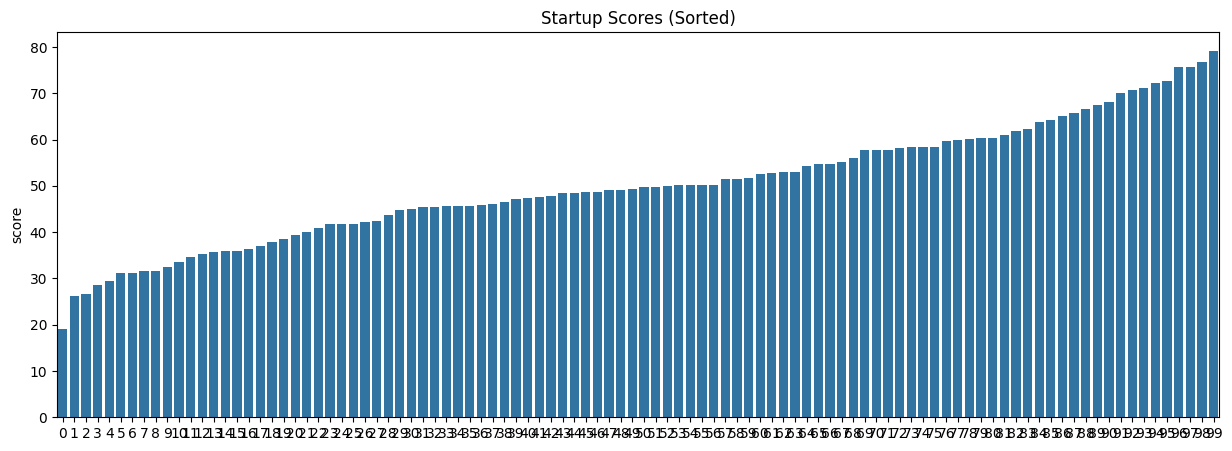

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=range(len(df_ranked)), y="score", data=df_ranked.sort_values("score"))
plt.title("Startup Scores (Sorted)")
plt.show()

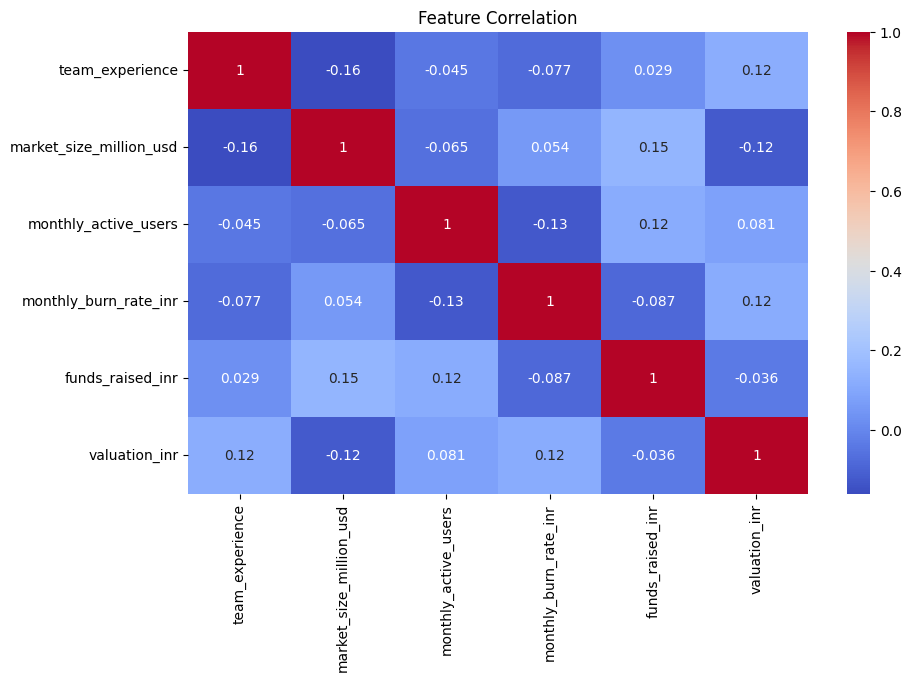

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df[cols_to_scale].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

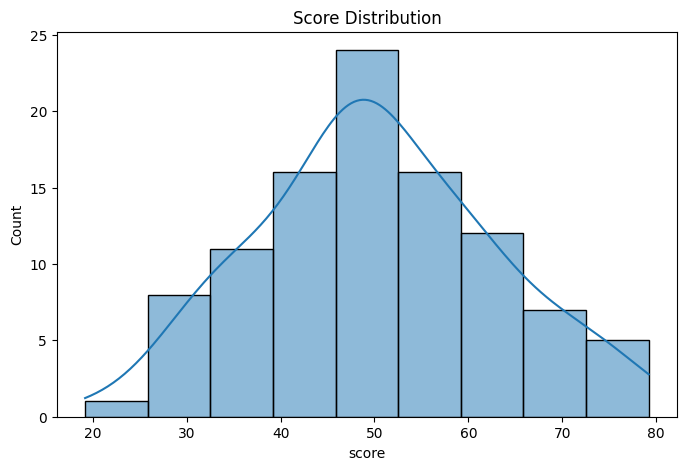

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df_ranked["score"], kde=True)
plt.title("Score Distribution")
plt.show()

In [21]:
from sklearn.cluster import KMeans

In [22]:
features_for_clustering = [
    "team_experience",
    "market_size_million_usd",
    "monthly_active_users",
    "monthly_burn_rate_inr",
    "funds_raised_inr",
    "valuation_inr",
    "score"
]


In [23]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

In [24]:
df_norm["cluster"] = kmeans.fit_predict(df_norm[features_for_clustering])

In [25]:
cluster_summary = df_norm.groupby("cluster")[features_for_clustering].mean()

In [26]:
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          team_experience  market_size_million_usd  monthly_active_users  \
cluster                                                                   
0               0.542735                 0.673625              0.659968   
1               0.549858                 0.517364              0.457901   
2               0.825397                 0.560009              0.786693   
3               0.354497                 0.423722              0.297386   

         monthly_burn_rate_inr  funds_raised_inr  valuation_inr      score  
cluster                                                                     
0                     0.507884          0.572909       0.471846  57.922264  
1                     0.448080          0.328974       0.483346  46.835485  
2                     0.667068          0.767443       0.686070  71.218708  
3                     0.366518          0.326128       0.223271  32.762171  


In [27]:
label_map = {
    0: "High traction, well-funded startups",
    1: "Early stage, low burn",
    2: "Rapid growth but high burn",
    3: "Low funding, low valuation niche startups"
}

In [28]:
df_norm["cluster_label"] = df_norm["cluster"].map(label_map)


In [29]:
df_final = pd.concat([df, df_norm[["score", "cluster", "cluster_label"]]], axis=1)


In [30]:
df_final.head(5)

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,score,cluster,cluster_label
0,S001,7,789,66299,6091495,4183839,263247468,54.710404,0,"High traction, well-funded startups"
1,S002,4,939,34866,9106842,666326,172927107,38.471612,3,"Low funding, low valuation niche startups"
2,S003,8,42,73630,8817088,649150,313090455,40.846648,1,"Early stage, low burn"
3,S004,5,57,93657,6374167,20153173,305887183,48.366183,1,"Early stage, low burn"
4,S005,7,512,61187,841971,118834,84815222,44.851381,1,"Early stage, low burn"
